In [48]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [49]:
words = open('names.txt').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [50]:
vocab = sorted(list(set(''.join(words))))
print(len(vocab))

stoi = {s:i+1 for i,s in enumerate(vocab)}
stoi['.']  = 0

itos = {i:s for s,i in stoi.items()}

print(stoi)
print(itos)

26
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [51]:
def build_dataset(words):
    
    vocab = sorted(list(set(''.join(words))))
    stoi = {s:i+1 for i,s in enumerate(vocab)}
    stoi['.']  = 0
    itos = {i:s for s,i in stoi.items()}

    X = []
    Y = []
    blocks_size  = 3
    for w in words:
        
        context= [0]*blocks_size
        
        for char in w + '.': 
            ix = stoi[char]
            X.append(context)
            Y.append(ix)
            # print(''.join([ itos[char] for char in context]), '---> ', itos[ix])
            # print(context)
            context = context[1:] + [ix]
            # print(context)
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

In [5]:
X,Y = build_dataset(words)
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [52]:
C = torch.randn(27,2)

In [53]:
C.shape

torch.Size([27, 2])

In [236]:
F.one_hot(torch.tensor(5), num_classes=27).float().shape

torch.Size([27])

In [237]:
emb = C[X]
print(emb.shape)
# emb
# incase of 3 block size
# emb1 = torch.cat((emb[:, 0 ,:], emb[:, 1, :], emb[:, 2, :]), 1)
# emb1.shape

# emb1 = torch.cat(torch.unbind(emb, 1),1)
# emb1.shape
# emb1.storage()
emb = emb.view(-1,6) 
emb.shape

torch.Size([228146, 3, 2])


torch.Size([228146, 6])

In [238]:
w1 = torch.randn(6, 100)
b1 = torch.randn(100)


In [239]:
a = torch.tanh(emb @ w1 + b1)
a.shape

torch.Size([228146, 100])

In [240]:
w2 = torch.randn(100,27)
b2 = torch.randn(27)

In [241]:
logits = a @ w2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape
prob

tensor([[1.8319e-06, 1.0000e-10, 6.7310e-10,  ..., 3.1865e-05, 4.8936e-04,
         2.9702e-04],
        [3.0040e-06, 5.8218e-06, 2.0156e-02,  ..., 2.1299e-17, 6.6942e-05,
         3.0086e-05],
        [2.6241e-04, 3.4477e-08, 3.2657e-11,  ..., 1.0019e-13, 1.0172e-09,
         3.0758e-08],
        ...,
        [7.9281e-07, 1.5591e-12, 9.8452e-11,  ..., 7.4900e-17, 1.4907e-06,
         2.8131e-07],
        [2.9121e-08, 1.7315e-08, 3.4201e-08,  ..., 9.1377e-01, 2.5151e-05,
         1.0455e-10],
        [5.2798e-08, 1.6000e-03, 2.1720e-05,  ..., 2.0492e-11, 3.1634e-07,
         1.2663e-06]])

In [242]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [213]:
F.cross_entropy(logits, Y)

tensor(13.7715)

In [54]:
# Initialization
def initialize_model():
    g = torch.Generator().manual_seed(2147483647)
    C = torch.randn((27,2), generator=g)
    W1 = torch.randn((X.shape[1]*C.shape[1], 100 ), generator=g)
    # print(W1.shape)
    b1 = torch.randn(100, generator=g)
    
    W2 = torch.randn((100,C.shape[0]), generator=g)
    b2 = torch.randn(C.shape[0], generator=g)
    
    parameters = [C, W1,b1, W2,b2]
    return parameters

parameters = initialize_model()

In [55]:
for p in parameters:
    p.requires_grad = True

In [57]:
ix = torch.randint(0, X.shape[0], (32,))
ix

tensor([  4732, 177376, 205624, 221122, 203349,  72105, 152967, 139187,   6962,
         97952,  50979,    101, 211067, 194800, 107758,  50838, 142384,  97228,
         78671,  68147, 159406,  48358, 183278,  27199,  16637, 216318,  43669,
         80558, 148543, 190165, 187957, 184620])

In [56]:
lre = torch.linspace(-3,0, 1000)
lrr = 10**lre
len(lrr)

1000

# Build Dataset
- read the names from the names.txt
- find the vocab or character in the name.txt file
- Chose the block-size and make example dataset from the names
- X: input to the model
- Y: output by the model during traing

In [77]:
import random
def build_dataset(file_path, context_len):
    words = open('names.txt', 'r').read().splitlines()
    random.shuffle(words)
    
    vocab = sorted(list(set(''.join(words))))
    stoi = {s:i+1 for i,s in enumerate(vocab)}
    stoi['.']  = 0
    itos = {i:s for s,i in stoi.items()}

    X = []
    Y = []
    blocks_size  = context_len
    for w in words:
        
        context= [0]*blocks_size
        
        for char in w + '.': 
            ix = stoi[char]
            X.append(context)
            Y.append(ix)
            # print(''.join([ itos[char] for char in context]), '---> ', itos[ix])
            # print(context)
            context = context[1:] + [ix]
            # print(context)
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

# Initialize the Model
- initialize the generator using torch.Generator().manual_seed(number)
- Initialize the the embedding matrix C
- 

In [78]:
def initialize_model(vocab_size, emb_dim,Input_data, layers_dim = []):
    g = torch.Generator().manual_seed(2147483647)
    C = torch.randn((vocab_size,emb_dim), generator=g)
    W1 = torch.randn((Input_data.shape[1]*emb_dim, layers_dim[0] ), generator=g)
    # print(W1.shape)
    b1 = torch.randn(layers_dim[0], generator=g)
    
    W2 = torch.randn((layers_dim[0],vocab_size), generator=g)
    b2 = torch.randn(vocab_size, generator=g)
    
    parameters = [C, W1,b1, W2,b2]
    return parameters

In [93]:
def model(X, parameters):
    emb = parameters[0][X]
    a1 = torch.tanh(emb.view(-1,30)  @ parameters[1] + parameters[2])
    logits = a1 @ parameters[3] + parameters[4]
    return logits

In [94]:
def requires_grad(parameters):
    for p in parameters:
        p.requires_grad = True
    return parameters

In [101]:
import random
context_len = 3
data_path = 'names.txt'
vocab_size = 27
emb_dim=10
layers_dim = [300,27]
epochs = 90000
X,Y = build_dataset(data_path, context_len)
num_examples = len(X)
Xtr,Xval,Xtest = X[0:int(0.7*num_examples)], X[int(0.7*num_examples):int(0.9*num_examples)], X[int(0.9*num_examples): num_examples]
Ytr,Yval,Ytest = Y[0:int(0.7*num_examples)], Y[int(0.7*num_examples):int(0.9*num_examples)], Y[int(0.9*num_examples): num_examples]

# print(Xtr.shape, Ytr.shape)
parameters = initialize_model(vocab_size, emb_dim, X, layers_dim = layers_dim)
parameters = requires_grad(parameters)
# print(X.shape)
# print(Y.shape)

lre = torch.linspace(-3,0, epochs)
lrr = 10**lre

#Forward Pass
lri = []
lossi = []
stepi = []
for i in range(epochs):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # print(Xtr[ix].shape)
    logits = model(Xtr[ix], parameters)
    # print(logits.shape)
    # Calculate Loss
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    
    # calculate the gradients
    loss.backward()
    
    #Gradient Descent
    lr = [0.1,0.01]
    if i<=30000:
        lr = lr[0]
    else:
        lr = lr[1]
    for p in parameters:
        p.data += -lr*p.grad
    lossi.append(loss.log10().item())
    lri.append(lr)
    stepi.append(i)
print(loss.item())


2.067507028579712


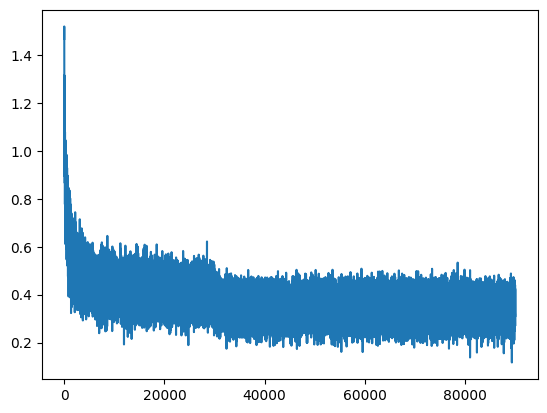

In [102]:
plt.plot(stepi, lossi)

In [96]:
logits = model(Xtr, parameters)
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2109315395355225

In [97]:
logits = model(Xval, parameters)
loss = F.cross_entropy(logits, Yval)
loss.item()

2.265597343444824

In [98]:
logits = model(Xtest, parameters)
loss = F.cross_entropy(logits, Ytest)
loss.item()

2.2726242542266846

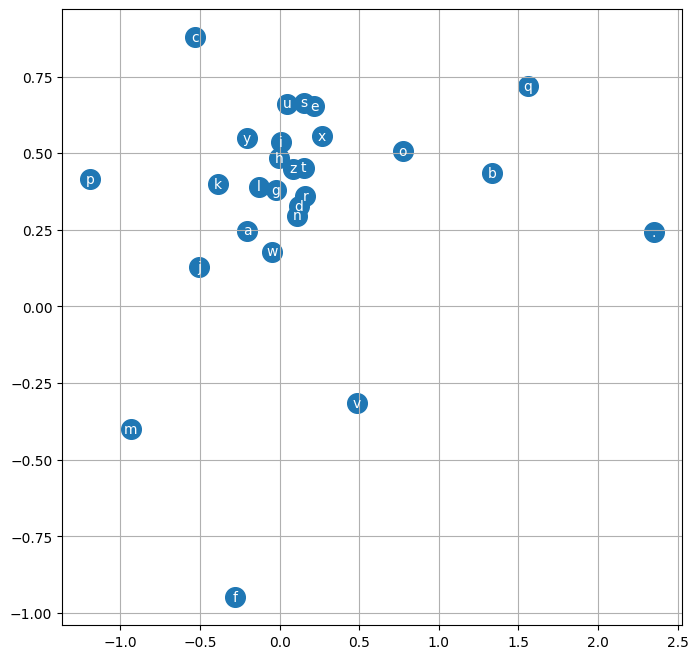

In [99]:
# plt.figure()
plt.figure(figsize=(8,8))
plt.scatter(parameters[0][:,0].data, parameters[0][:,1].data, s=200)
for i in range(parameters[0].shape[0]):
    plt.text(parameters[0][i,0].item(), parameters[0][i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')